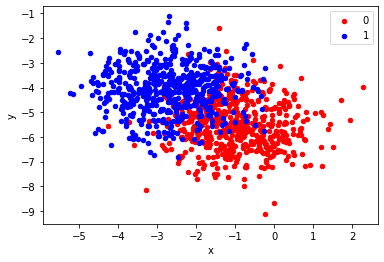

In [2]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X_train1, y_train1 = make_blobs(n_samples=1100, centers=2, n_features=2, shuffle=True, random_state=300)
# scatter plot, dots colored by class value
train1 = DataFrame(dict(x=X_train1[:,0], y=X_train1[:,1], label=y_train1))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = train1.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [3]:
print("Number of samples in X_train : {}" .format(len(X_train1)))
print("Number of samples in y_train : {}" .format(len(y_train1)))

Number of samples in X_train : 1100
Number of samples in y_train : 1100


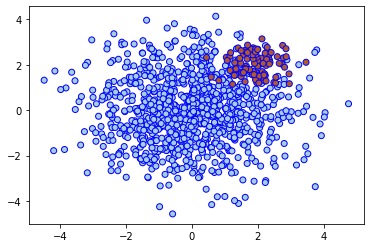

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X_test3, y_test3 = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_test3, y_test3)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X_test3, y_test3)

# plot the samples
plt.scatter(X_test3[:, 0], X_test3[:, 1], c=y_test3, cmap=plt.cm.Paired, edgecolors='blue')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)


# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)


plt.show()

In [5]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# Finding Best K value and displaying training and test classification accuracy values in a plot
k_range = range(1, 35, 2)

# Testing and Testing accuracy
testing_accuracy_scores=[]
training_accuracy_scores=[]

best_k = 0
max_val = 0

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, y_train1)
    
    y_training_pred = knn.predict(X_train1)
    train_score = metrics.accuracy_score(y_train1, y_training_pred)
    training_accuracy_scores.append(train_score)

    y_test_pred = knn.predict(X_test3)
    test_score = metrics.accuracy_score(y_test3, y_test_pred)
    testing_accuracy_scores.append(test_score)
    
    if test_score > max_val:
        max_val = test_score;
        best_k = k;

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print("KNN Train Test Accuracy with respect to K")

plt.plot(k_range, training_accuracy_scores, label = "training_accuracy")
plt.plot(k_range, testing_accuracy_scores,color="red", label = "testing_accuracy")
plt.xlabel("K")
plt.ylabel("Accurancy")
plt.legend()
plt.show()

In [7]:
print("Best K = ", best_k)

Best K =  1


In [8]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train1, y_train1)

y_train_pred = knn_model.predict(X_train1)
print("Training accuracy for best K = ", metrics.accuracy_score(y_train1, y_train_pred))

Training accuracy for best K =  1.0


In [9]:
y_test_pred = knn_model.predict(X_test3)
testAccuracy = metrics.accuracy_score(y_test3, y_test_pred)
print("Test accuracy for best K = ", testAccuracy)

Test accuracy for best K =  0.5490909090909091


# COMMENT
For the third data set, very different from the test data of the first and second data sets, I created a data with a different amount of distribution ratio and collected in a single region. As can be seen from the graph here, the best K value is 1. In the graph, there is an underfit situation for values greater than 1. Here the bias is high while the variance is low. In this example, since the red dots in the test data are collected in a single region, accuracy decreases at high K values. For the 1k value in this graph, the test and training data have the closest accuracy values to each other. When the number of data increases, the training acuracy value does not change, while the test accuracy starts to decrease. In this case, the best value of k remains 1.

In [10]:
X_train1_desc = train1.x.describe()
X_train1_desc

count    1100.000000
mean       -1.850827
std         1.295684
min        -5.543785
25%        -2.769802
50%        -1.835583
75%        -0.955043
max         2.266762
Name: x, dtype: float64

In [11]:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler().fit(X_train1)

X_train1_scaled = scaler.transform(X_train1)
X_train1_scaled

array([[ 0.20124992,  1.274339  ],
       [-0.77630549,  0.52045789],
       [-0.30989301, -0.0045235 ],
       ...,
       [ 0.80316071, -0.39248866],
       [-0.54399796,  0.402876  ],
       [ 0.58568422, -0.44893319]])

In [12]:
X_test3_scaled = scaler.transform(X_test3)
X_test3_scaled

array([[2.46956342, 2.93343057],
       [1.82045691, 4.43913255],
       [2.55511666, 1.80670368],
       ...,
       [1.94025394, 3.98852768],
       [1.94242999, 4.16971218],
       [1.81095058, 3.85288896]])

In [13]:
# Finding Best K value and displaying training and test classification accuracy values in a plot
testing_accuracy_scores=[]
training_accuracy_scores=[]

best_k = 0
max_val = 0

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1_scaled, y_train1)
    
    y_training_pred = knn.predict(X_train1_scaled)
    train_score = metrics.accuracy_score(y_train1, y_training_pred)
    training_accuracy_scores.append(train_score)

    y_test_pred = knn.predict(X_test3_scaled)
    test_score = metrics.accuracy_score(y_test3, y_test_pred)
    testing_accuracy_scores.append(test_score)
    
    if test_score > max_val:
        max_val = test_score;
        best_k = k;

KNN Train Test Accuracy with respect to K on scaled data


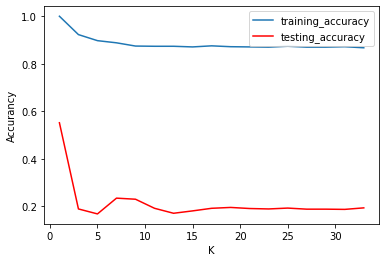

In [14]:
print("KNN Train Test Accuracy with respect to K on scaled data")

plt.plot(k_range, training_accuracy_scores, label = "training_accuracy")
plt.plot(k_range, testing_accuracy_scores,color="red", label = "testing_accuracy")
plt.xlabel("K")
plt.ylabel("Accurancy")
plt.legend()
plt.show()

In [15]:
print("Best K on scaled data = ", best_k)

Best K on scaled data =  1


In [16]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train1_scaled, y_train1)

y_train_pred = knn_model.predict(X_train1_scaled)
print("Training accuracy for best K on scaled data = ", metrics.accuracy_score(y_train1, y_train_pred))

Training accuracy for best K on scaled data =  1.0


In [17]:
y_test_pred = knn_model.predict(X_test3_scaled)
testScaledAccuracy = metrics.accuracy_score(y_test3, y_test_pred);
print("Test accuracy for best K on scaled data = ", testScaledAccuracy)

Test accuracy for best K on scaled data =  0.5518181818181818


In [18]:
print("Test accuracy for best K on original (unscaled data) = ", testAccuracy)

increaseInAccuracy = 100 * (testScaledAccuracy - testAccuracy)
print("Increase due to scaling on test accuracy  = ",round(increaseInAccuracy, 2), "%")

Test accuracy for best K on original (unscaled data) =  0.5490909090909091
Increase due to scaling on test accuracy  =  0.27 %
